# Number Recognition

Simple 2-layer model to recognize handwritten numbers.

Model classifies 28x28 grayscale images from MNIST data set into one of the 10 digits.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load the input data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Shape of data
-------------
Training data (60000, 28, 28)
Training labels (60000,)
Test data (10000, 28, 28)
Test labels (10000,)

Sample labels [5 0 4 1 9]

Sample Image
------------
Expected label 5


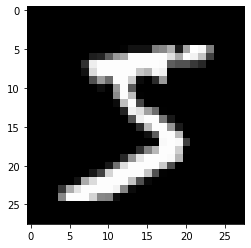

In [11]:
# Lets take a peek at the data.
print('Shape of data')
print('-------------')
print('Training data', x_train.shape)
print('Training labels', y_train.shape)
print('Test data', x_test.shape)
print('Test labels', y_test.shape)
print()
print('Sample labels', y_train[:5])
print()

# Sample image
index = 0
print('Sample Image')
print('------------')
plt.imshow(x_train[index], cmap='gray')
print('Expected label', y_train[index])

## Observations
* We have 60,000 28x28 grayscale images. Images are white on black background.
* Y labels are not one-hot encoded.
* We have 10,000 test images.

We want the model to recognize both white numbers on black background and black numbers of a white background. Augment the data with inverted grayscale images.

In [21]:
# Augment data with inverted grayscale images.
x_train_inv = 255 - x_train
x_test_inv = 255 - x_test

x_train = np.append(x_train, x_train_inv, axis=0)
y_train = np.append(y_train, y_train, axis=0)
x_test = np.append(x_test, x_test_inv, axis=0)
y_test = np.append(y_test, y_test, axis=0)

# Print the new shape of train and test data.
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(240000, 28, 28) (240000,) (40000, 28, 28) (40000,)


## Rationale behind the model

Model performance vs. number of units in the hidden relu layer.

||Units|Parameters|Train Acc.|Test Acc.|
|--|--|--|--|--|
|Model 1|128|~100,000|97%|95%|
|Model 2|64|~51,000|97%|95%|
|Model 3|32|~25,000|95%|94%|
|Model 4|16|~12,000|90%|90%|

Models 1 and 2 overfit the training set and are computationally expensive. 
Model 3 offers the best tradeoff - slight loss of accuracy for better computational performance.

In [36]:
# Create the model
inputs = keras.Input(shape=(28, 28))

# Normalize grayscale values.
x = layers.experimental.preprocessing.Rescaling(1.0/255.)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Use sparse_categorical_crossentropy instead of categorical_crossentropy because Y-labels are not one-hot encoded.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.6543 - accuracy: 0.7881
Epoch 2/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.3662 - accuracy: 0.8931
Epoch 3/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.3183 - accuracy: 0.9052
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.2680 - accuracy: 0.9209
Epoch 5/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.2307 - accuracy: 0.9311
Epoch 6/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.2087 - accuracy: 0.9380
Epoch 7/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1966 - accuracy: 0.9413
Epoch 8/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1844 - accuracy: 0.9448
Epoch 9/10
7500/7500 [==============================] - 10s 1ms/step - loss: 0.1727 - accuracy: 0.9480
Epoch 10/10
7500/7500 [==============================] - 10s 1ms/step - lo

In [35]:
# Evaluate the model on the test set.
model.evaluate(x_test, y_test)

1250/1250 [==============================] - 1s 970us/step - loss: 0.3458 - accuracy: 0.9018


[0.34578704833984375, 0.9017999768257141]


    Expected: 4
    Predicted: 4
    Probability: 0.93


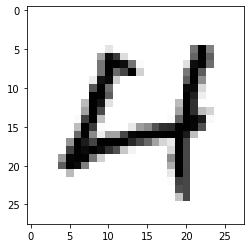

In [49]:
# Test the model.
index = 12005
x_in = x_test[index]
plt.imshow(x_in, cmap='gray')
preds = model.predict(np.array([x_in]))[0]
pred_val = np.argmax(preds)
print(f"""
    Expected: {y_test[index]}
    Predicted: {pred_val}
    Probability: {preds[pred_val]:.2f}"""
)

## Conclusion

This is a very simple model to illustrate Keras and Deep Learning. It will not work as well in the real world for couple of reasons:
* Numbers may not be centered in the image or could be smaller relative to the image. 
* Background noise can be varied - lines, spots.

For the simple purpose of illustrating building a deep learning model in Keras, I think it serves well.

Next lets deploy this model and see how it does with recognizing real handwritten numbers!!